<a href="https://colab.research.google.com/github/aah217/ai-science-training-series/blob/main/05_handling_data/homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
!pip install python3-wget
import wget
import re
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
x = []
dx = []
filenames = []
filenames.append(wget.download('https://raw.githubusercontent.com/aah217/ai-science-training-series/main/05_dataPipelines/output_buffer4.txt'))
filenames.append(wget.download('https://raw.githubusercontent.com/aah217/ai-science-training-series/main/05_dataPipelines/output_buffer8.txt'))
filenames.append(wget.download('https://raw.githubusercontent.com/aah217/ai-science-training-series/main/05_dataPipelines/output_buffer16.txt'))
for filename in filenames:
  with open(filename) as f:
    x.append([])
    dx.append([])
    for line in f:
      #example of print statement
      #mean image/s =   542.92   standard deviation:   525.27
      check = re.match(r"mean image/s",line)
      if check is not None: 
        #grab stuff
        x[-1].append(float(re.search("image/s =\s+(\S+)\s+standard",line).group(1)))
        dx[-1].append(float(re.search("standard deviation:\s+(\S+)",line).group(1)))

#check the amount of data we grabbed makes sense
x = np.array(x)
dx = np.array(dx)
print(x)
print(dx)

[[ 542.92  585.03  652.24  751.31  845.42  867.04  890.23  728.45]
 [ 441.54  980.38 1004.26 1052.26 1088.94  980.89  860.8   679.61]
 [ 552.45 1024.37 1149.73 1136.4  1096.32 1000.71  891.56  747.24]]
[[525.27 486.59 411.37 336.   231.47 264.79  76.9   91.57]
 [496.23 414.2  336.51 225.09  23.01 112.62  62.9   31.99]
 [523.86 304.87  78.66  13.87  28.39  68.05  37.01  55.59]]


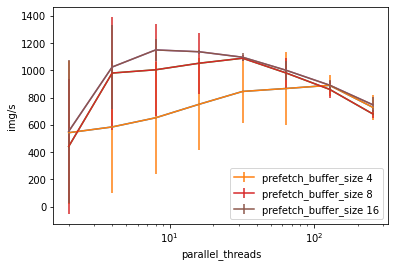

In [31]:
xvals = [2,4,8,16,32,64,128,256]
setlabels = ["prefetch_buffer_size 4","prefetch_buffer_size 8","prefetch_buffer_size 16"]
for i,each in enumerate(x):
  plt.plot(xvals,each)
  plt.errorbar(xvals,each,dx[i],label=setlabels[i])
plt.xscale("log")
plt.xlabel("parallel_threads")
plt.ylabel("img/s")
plt.legend(loc='lower right')
plt.show()
